# Analysis of Multivariate Data - NHANES case study

In this notebook, we illustrate several basic techniques for exploring data using methods for understanding multivariate relationships.  The statistical methods discussed here will parallel the methods discussed in the multivariate methods section of the course, and build on the univariate analysis discussed earlier.  As with the univariate notebook, we use here the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study for illustration.

Many of the analyses presented in this notebook use the Matplotlib and Seaborn libraries for data visualization.  These are very powerful tools that give you a vast number of options when constructing plots.  We will not explain every option to every function in the examples below. You can use the [Matplotlib](https://matplotlib.org/users/index.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html) documentation to fully understand the options, and you can experiment with these and other plots on your own to get a better sense of what can be done.

In [1]:
# Importing  libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Loading the dataset
df = pd.read_csv('nhanes_2015_2016.csv')

### Quantittative Bivariate Data

***Bivariate Date*** arise when every "unit of analysis" (e.g. a person in the NHANES dataset. In other words "observation") is assessed with respect to two traits (the NHANES subjects were assessed for many more than two traits, but we can consider two traites at a time here). 

A scatterplot is a very common and easily-understood visualization of quantitative bivariate data.  Below we make a scatterplot of arm length against leg length.  This means that arm length ([BMXARML](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXARML)) is plotted on the vertical axis and leg length ([BMXLEG](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXLEG)) is plotted on the horizontal axis).  We see a positive dependence between the two measures -- people with longer arms tend to have longer legs, and vice-versa.  However it is far from a perfect relationship.

When having points that overlap each other "overplotting", it becomes an issue. Of course, this will yield obsecure relationships in the middle of the distribution and over-empasizes the extremes. We can **mitigate** overplotting by using an <u>alpha</u> channel to make the points semi-transparent. 

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

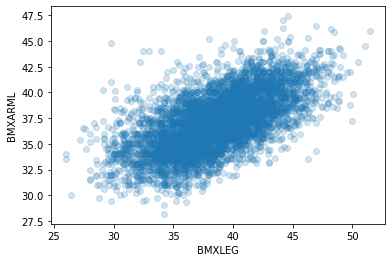

In [3]:
sns.regplot(x='BMXLEG', y='BMXARML', data=df, fit_reg=False, scatter_kws={"alpha": 0.2})
# fit_reg If True, estimate and plot a regression model relating the x and y variables.


Another wat to avoid overplotting is to mke a plot of the "density" of points. In the plots below, dark color indicate where a greater number of points fall. The two plot margins show the densities for the arm lengths and leg legnths separately, while the plot in the center shows their density jointly.

This plot also shows the Pearson correlation coefficient between the arm length and leg length, which is 0.62 (Remember, the Pearson Correlation coefficient ranges from -1 to 1, with values approaching 1 indicating a more perfect positive dependence).
In many settings, a correlation of 0.62 would be considered a moderately strong positive dependence. 

AttributeError: 'JointGrid' object has no attribute 'annotate'

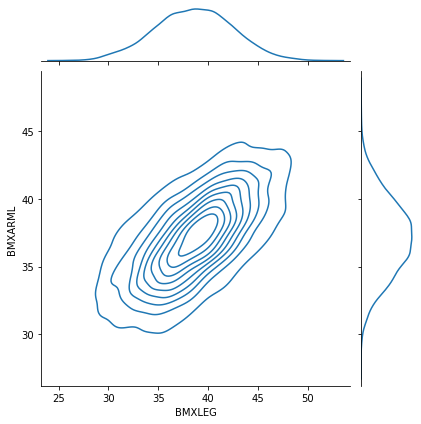

In [4]:
#ignore deprecation warning message
sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=df).annotate(stats.pearsonr)

"""With version >=0.11 of seaborn, jointgrid annotation is removed so
you won't see the pearsonr value.If needed to display, one way is to calculate the 
pearsonr and put it in the jointplot as a legend."""

As another example with slightly different behavior, we see that systolic and diastolic blood pressure (esentially the maximum and minimum blood pressure between two consecutive heart beats) are more weakly correlated than arm and leg legnth with a correlation coefficient of 0.32. This weaker correlation indicates that some poeple have unusually high systolic blood pressure but have average diastolic blood pressure, and vice versa.

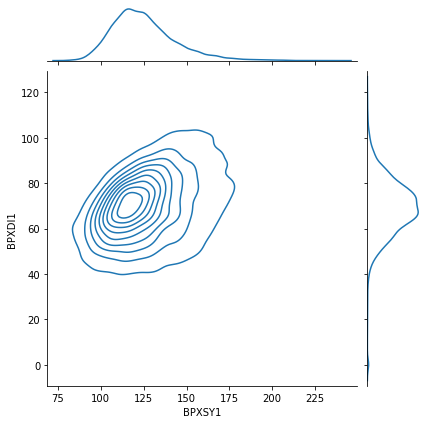

In [5]:
sns.jointplot(x='BPXSY1', y='BPXDI1', kind='kde', data=df)

Next we look at two repeated measures of systolic blood pressure, taken a few minutes apart on the same person. Notice that these two values are highly correlated, with a correlation coefficient of around 0.96.

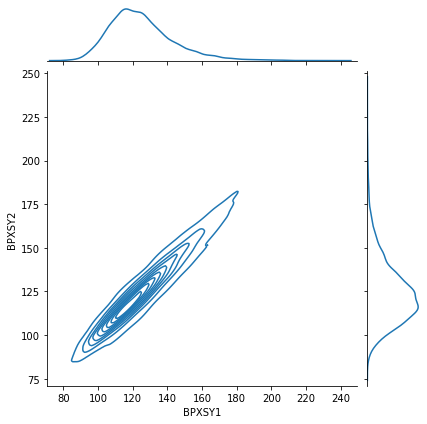

In [6]:
jp = sns.jointplot(x='BPXSY1', y='BPXSY2', kind='kde', data=df)

### Heterogeneity and Stratification
**Heterogeneity** is when the same data varies from others(the quality or state of being diverse in character or content.) Most human characteristics are complex -- they vary by gender, age, ethnicity, and other factors. This type of variation is often referred to as "heterogeneity". When such heterogeneity is present, it's usually productive to explore the data more depply by stratifying on relevant factors, as we did in univariate analyses. 

Below, we continue to probe the relationship between leg length and arm length, stratifying first by gender, then by gender and ethnicity. The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women -- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right.  In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.

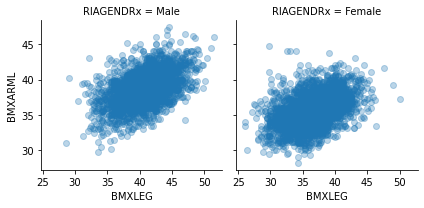

In [7]:
df['RIAGENDRx'] = df.RIAGENDR.replace({1:"Male", 2:"Female"})
sns.FacetGrid(df, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.3)

As we can see, the correlation between arm length and leg legnth is weaker in women comparing to men. It can be seen clearly when calculating the correlation coefficient separately within each gender.

Using `corr` method of a dataframe calculates the correlation coefficient for every pair of variables in the dataframe. This method returns a "correlation matrix", which is a table containing the correlations between every pair of variables in the data set. Note that the diagonal of a correlation matrix always contains 1's, since a variable always has correlation 1 with itself. The correlation matrix is also symmetric around this diagonal, since the correlation between two variables '`X`' and '`Y`' does not depend on the order in which we consider the two variables.

In [10]:
print(df.loc[df.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr())
print(df.loc[df.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Now, we'll be stratiifying data by both gender and ethnicity. This results in 2 x 5 = 10 strata, since there are 2 gender srata and 5 ethnicity strata. The following scatterplots reveal differences in the means as well as a difference in the degree of association(correlation) between different pairs of variables. We could easily conclude that even though some ethnic groups tend to have longer/short arms and legs than others, the relationship between arms and legs within genders is roughly similar across all of the ethnic groups. 

One notable observation is that ethnic group 5, which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between arm length and leg length is stronger, especially for men. This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data(Don't Get It).

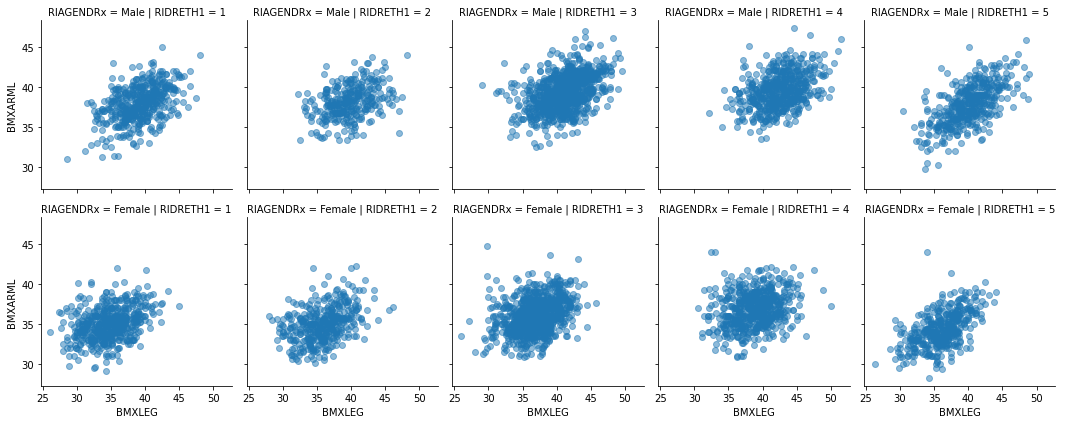

In [14]:
_ = sns.FacetGrid(df, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

## Categorical Bivariate Data

We'll be discuessing some methods for working with bivariate data that are categorical. We can start with `Contingency Table` which counts the number of people having each combination of two factors. For illustrate, we'll be considering NHANES variables for marital status and education level.

We'll kick off by renaming these two variables using text labels instead of numbers to represent categorical data. We also create a new data set that omits people who responded "Don't know" or who refused to answer these questions. 

In [44]:
df['DMDEDUC2x'] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df['DMDMARTLx'] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

db = df.loc[(df.DMDEDUC2x != "Don't know") & (df.DMDMARTLx != "Refused"), :]

**Now we can create a contingency table, counting the numbers of people in each cell defined by a combination of education and marital status**

In [57]:
x = pd.crosstab(db.DMDEDUC2x, df.DMDMARTLx)
#                    why not (db?). Because it'll not make any difference. The cross table(or contingency table) counts the values that exists in both variables(education & marital)
#                    status. Since the "Don't know" and "Refused" values don't exist in both attributes(variables), then they won't show up if only one column has them.
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


the result will be easier to interpret if we normalize the data. A contingency table can be normalized in three ways: <u>(1) we can make the rows sum to 1, (2) the columns sum to 1, (3) or the whole table sum to 1.</u> <code>The following tables is normalized within rows. **This gives the proportion of people in each educational attainment category who fall into each group of the marital status variable.**</code>

The modal (most common) marital status for people within each educational attainment group is "married". However quantitatively, the proportion of people who are married varies substantially, and is notably higher for college graduates (around 61%) compared to groups with lower educational attainment.

In [60]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


We can also normalize within the columns instead of normalizing within the rows. <code>**This gives us the proportion of people with each marital status group who have each level of educational attainment.**</code>

In [61]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


It is quite plausible that there are gender differences in the relationship between educational attainment and marital status.  Therefore we can look at the proportion of people in each marital status category, for each combination of the gender and education variables. 

This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

#### The following line of code does these steps:
#### 1 Group the data by every combination of gender, education, and marital status.
#### 2 Count the number of people in each cell using the `size` method.
#### 3 Pivot the martial status results into the columns (using `unstack()`.
#### 4 Fill any empty cells with 0.
#### 5 Normalize the data by row.

In [72]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

One factor behind the greater number of women who are divorced and widowed could be that women live longer than men. To minimize the impact of this factor, we can recalculate the above table using a few narrow bands of ages. To simplify here, we collapse the marital status data to characterize people as being either "married" or "unmarried" This allows us to focus on the marriage rate, which is a widely-studied variable in social science research.


There are a number of intriguing results here. For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 40 and 49 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men). However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample). There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

In [84]:
dx = db.loc[(db.RIDAGEYR >=40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 59)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("\n")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000


DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.509804  0.500000  0.640777  0.537634        0.500000
Male       0.678571  0.608696  0.765432  0.634409        0.596154


We conclude this section by noting that **marital status is associated with many factors, including gender and eduational status**, but also <u>varies strongly by age and birth cohort</u>. For example, it is unlikely for young people to be widowed, and it is less likely for older people to be "never married", since a person can transition from "never married" into one of the other categories, **but can never move back.** <u>Below we will consider the role of age in more detail</u>, and later in the course we will revisit these questions using more sophisticated analytic methods that can account for all of these factors simultaneously. ***However***, since NHANES is a cross-sectional study, <u>there are certain important questions that it cannot be used to answer</u>. For example, while we know each person's current marital status, we do not know their full marital history (e.g. how many times and at what ages they were married or divorced).

## Mixed Categorical and Quantitative Data

Another situation that commonly arises in data analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. We'll be using martial status and age in the NHANES data to represent the their relationship as categorical and quantitative data. Specifically, we consider the distribution of ages for people who are currently in each marital status category. A natural tool in this setting is side-by-side boxplots. 

**Here we see some unsurprising things -- widowed people tend to be older, and never-married people tend to be younger.**

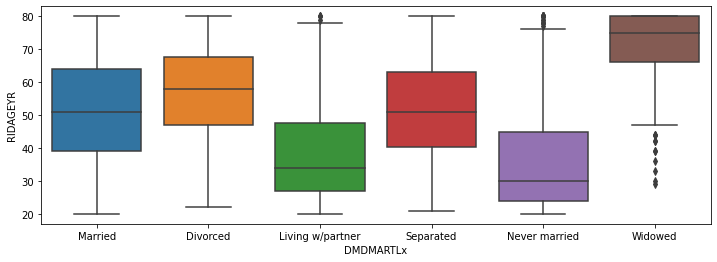

In [86]:
plt.figure(figsize=(12, 4))
a = sns.boxplot(data = db, x="DMDMARTLx", y="RIDAGEYR")

When we have enough data, a "violinplot" gives a bit more insight into the shapes of the distributions compared to a traditional boxplot. We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed. The other distributions have intermediate mean values, and are approximately symmetrically distributed. Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

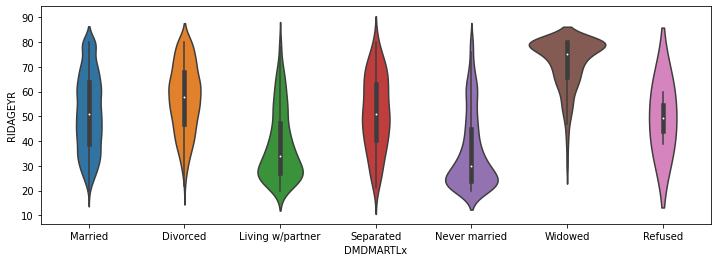

In [89]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(data = df, x="DMDMARTLx", y="RIDAGEYR")

<hr>
<hr><hr>
<hr><hr><hr><hr>


# More Practice on Multivariate Analysis

# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data. These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("nhanes_2015_2016.csv")
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


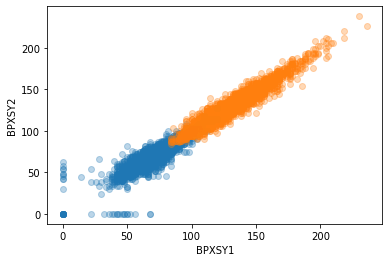

In [2]:
# enter your code here
a = sns.regplot(x="BPXDI1", y="BPXDI2", data=df, fit_reg=False, scatter_kws={"alpha":0.3})
print(a)

b = sns.regplot(x="BPXSY1", y="BPXSY2", data=df, fit_reg=False, scatter_kws={"alpha": 0.3})
print(b)
# The correlation between systolic blood measuremetns and the diastolic
# blood pressure measures.
df[["BPXDI1", "BPXDI2", "BPXSY1", "BPXSY2"]].corr()

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The plot shows that both of measurements of the blood pressure are correlated poistively. Around 0.89 correlation between dialostic blood pressure measurements, and 0.96 correlation between systolic blood pressure measurements.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

They're less correlated in about 0.1 rate. For the correlation between second systolic and diastolic is 0.30 and the correlation between the first systolic and diastolic is 0.31

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

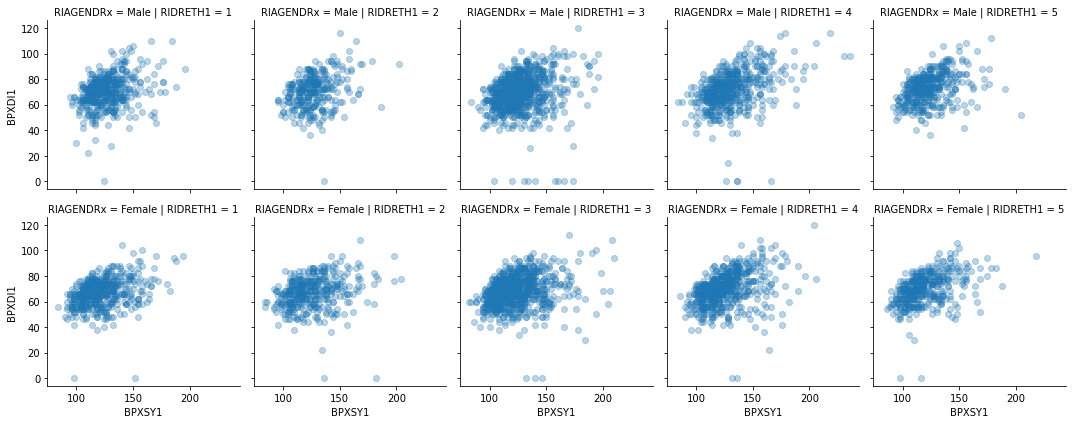

In [3]:
# insert your code here
df['RIAGENDRx'] = df.RIAGENDR.replace({1:"Male", 2:"Female"})
sns.FacetGrid(df, row="RIAGENDRx", col="RIDRETH1").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.3)

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

In general, they're all correlated to some extent. Nevertheless, we see less correlation in the ethnicity 2, esp. within females. Hence, the most correlated ehnicity is number 5, it's also esp. within females.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

<AxesSubplot:xlabel='DMDEDUC2x', ylabel='RIDAGEYR'>

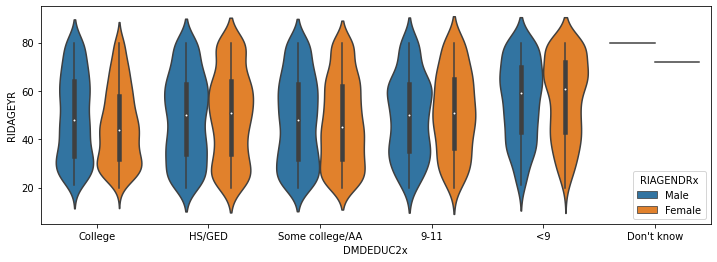

In [4]:
## insert your code here
df['DMDEDUC2x'] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
plt.figure(figsize=(12, 4))
sns.violinplot(data=df, x="DMDEDUC2x", y="RIDAGEYR", hue="RIAGENDRx")

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

There are tons of similarities among the distributions, esp. for "some college" distributions and "<9". Nevertheless, it's noticeable that Males tend to preserve getting college degrees throughout the different ages, on the other hand, women getting college degrees tend to decrease when they getting older.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

<AxesSubplot:xlabel='agegroup', ylabel='BMXWT'>

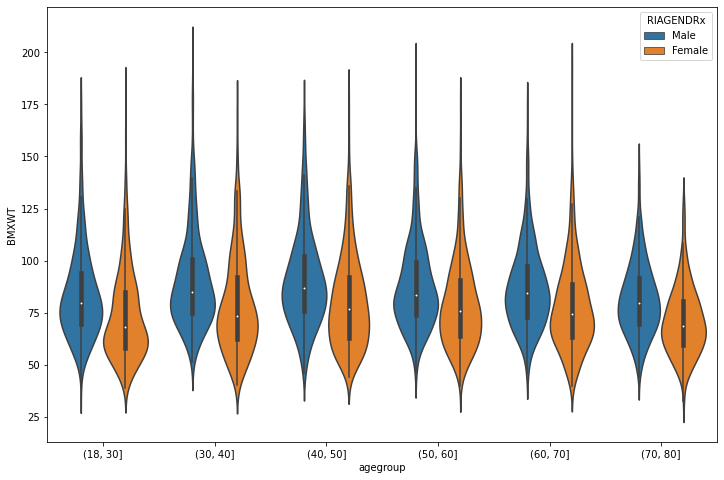

In [5]:
# insert your code here
df['agegroup'] = pd.cut(df["RIDAGEYR"], [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="agegroup", y="BMXWT", hue="RIAGENDRx")

__Q5a.__ Comment on the trends in BMI across the demographic groups.

As the plot tells, people who are between 70-80 tend to have less BMI weight, esp. females. And for most cases, men have more BMI than women througout the observations.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [6]:
# insert your code here
df["RIDRETH1x"] = df.RIDRETH1.replace({1:"Mexican American", 2:"Other Hispanic", 3:"Non-Hispanic White"
                                      , 4:"Non-Hispanic Black", 5:"Other Race - Including Multi-Racial"})
df["HIQ210x"] = df.HIQ210.replace({1:"Yes", 2:"No", 7:"Refused", 9:"Don't know"})

#cross_tab = pd.crosstab(df.HIQ210x, df.RIDRETH1x)
#cross_tab
df.groupby(["HIQ210x", "RIDRETH1x"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

RIDRETH1x,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other Race - Including Multi-Racial
HIQ210x,,,,,
Don't know,0.375000,0.125000,0.250000,0.000000,0.250000
No,0.135426,0.216963,0.359653,0.117385,0.170572
Yes,0.203947,0.247807,0.243421,0.162281,0.142544


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

As it shows here, the Non-Hispanic White ethnicity has the highest rate of being uninsured in the past year.